In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mnist_helper
%aimport mnist_helper

mnh = mnist_helper.MNIST_Helper()

import class_helper
%aimport class_helper

clh= class_helper.Classification_Helper()


In [4]:
from sklearn.model_selection import cross_val_score

# Beyond accuracy for full MNIST

We now have tools to *measure* weaknesses in our predictions.

But to become a successful Data Scientist, you will need to take some *action* to correct the mis-predictions.

The first step will be to roll up our sleeves
- perform a deep dive into the mis-classified examples
- determine if there is a systematic problem
- propose model improvements
    - Feature Engineering: adding features to help the model identify classes more easily
    - Modify the cost functions
    
We will focus on the deep dive for now, and defer the improvements to a later module.

We perform a deep-dive on the results of the full 10 class MNIST Logistic Regression classifier.

We illustrate the multitude of tools that an enterprising Data Scientist can use
beyond Accuracy.

Let's start by fitting the model.

In [5]:
mnh = mnist_helper.MNIST_Helper()
mnh.setup()

mnh.fit()

Retrieving MNIST_784 from cache


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

Let's examine the Confusion Matrix for potential issues

Normalized confusion matrix


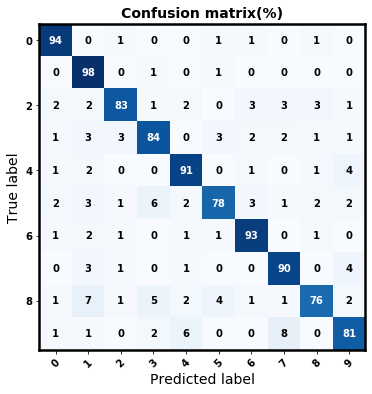

In [6]:
# Now predict the value of the digit on the second half:
fig, ax = plt.subplots(figsize=(12,6))
confusion_mat = mnh.create_confusion_matrix()

digits = range(0,10)
_= clh.plot_confusion_matrix(confusion_mat, digits, ax=ax, normalize=True)


- You can see that we didn't do equally well for all digits
    - "5", "8": below 80% correctly classified
    - "2", "3", "9": 80%-90% correctly classified
    
- Questions:
    - Are the errors acceptable ?
    - What can we do about the errors ?

We will perform some diagnostics on the classification of a *single* digit.

If we pick up a pattern on examples for this digit that have been misclassified
- we have identified a cause (commonality of problem examples)
- might be able to improve the model by feature engineering
    - hand-engineer a feature for the problem cases

Consider the multinomial MNIST classification problem with class $C = \{ 
\text{'0', '1'}, \ldots, \text{'9'} \}$

Let $D \in C$ be a particular digit that we wish to focus on.

Perhaps this is a digit for which the confusion matrix shows problems.

We will look at *accuracy conditional on* correct label being $D$.
- we turn the results of the multinomial classifier into a binary classifier with class $C' = \{ \text{Is D}, \text{Is not D} \}$

So we are essentially testing the Recall of digit $D$.

Let's see some examples of misclassified digits.

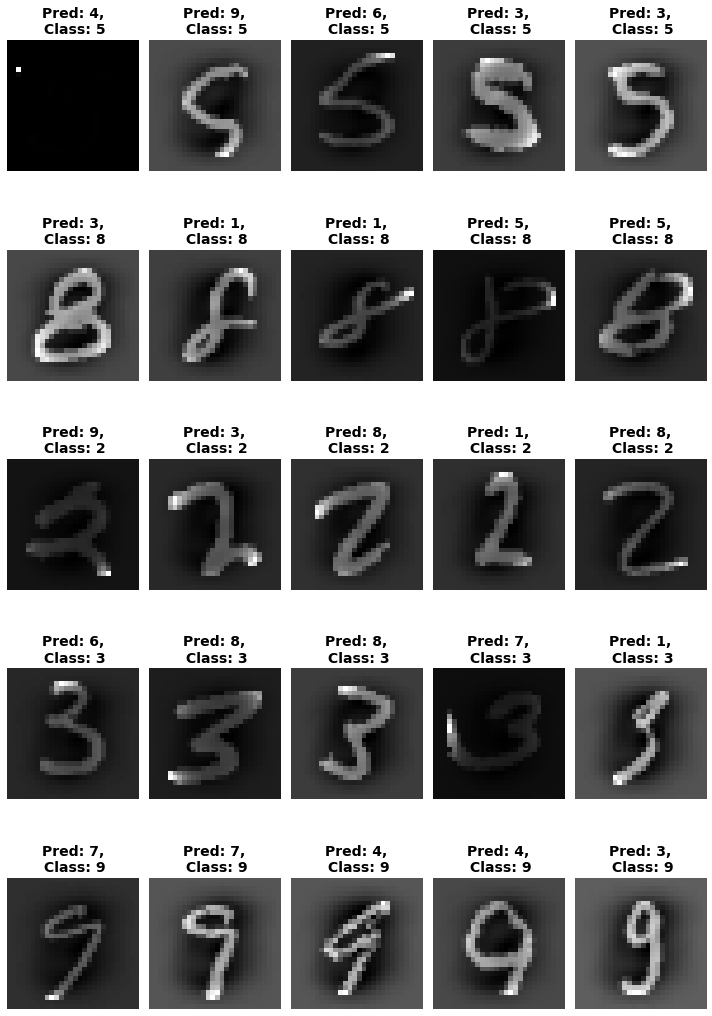

In [7]:
problem_digits = [ '5', '8', '2', '3', '9' ]

mnh.plot_problem_digits( problem_digits )

The first row shows the misclassified 5's.

Why were they mis-classified ?

It's possible that the probability of the incorrect class was barely above the correct one.

Was that the case here ?

Let's examine the probability vector $\hat{p}$ predicted for a number of examples.

**Note**
The prediction is the class at index $i$ where 
$$i = \argmax{j} \hat{p}_j$$

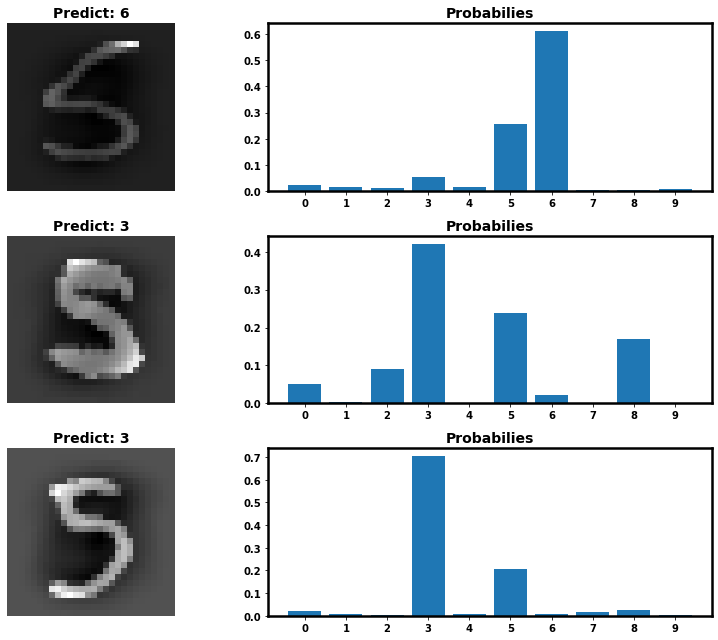

In [8]:
# Select some mis-classified "5"'s'
problems = mnh.misclassified["5"][ [2,3,4] ]
mnh.predict_with_probs(problems, digits)

Examining the probabilities: 
- the predicted class had highest probability; was the correct class probability even close ?
- what were the other potential candidate classes ?

Any theories why the misclassification occured ?

That would be the first step in fixing the problem
- perhaps some feature engineering would help

In the Deep Learning part of the course, we will show how the decision of a classifier may be "explained".

The techniques might help here, in the Classical setting, as well.

Let's narrow our focus to a single misclassified digit in
an attempt to gain more insight.

The digit 8 seems to get misclassified as the digit 1.  Let's explore.

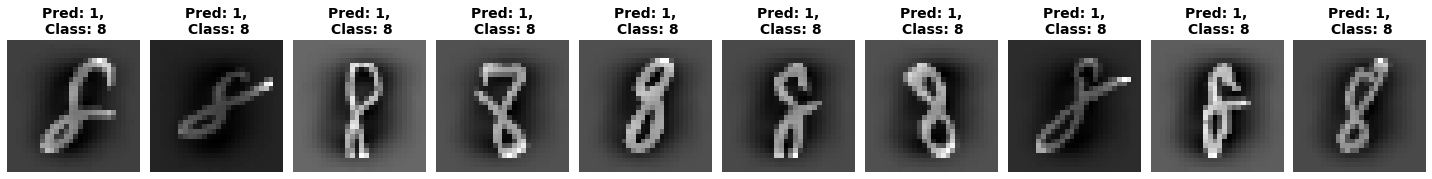

In [9]:
mnh.plot_problem_digits( ['8'], wrong_class='1', num_cols=10)

- Is the strong vertical part in the center the problem ?
- Are small black holes a problem ?

Now that you can visualize the "problems", can you think of ways to improve the prediction ?

We didn't offer any answers or potential solutions.

Our goal was merely to show
- that you *don't have to stop* with a summary statistic
- you don't need a specialized package to examine errors

Error analysis is what separates an adequate Data Scientist from a successful one.

In [10]:
print("Done")

Done
